## Normal transformations 

- Some models assume that the data is normally distributed 

- We can transform variables to show a normal distribution 


## Examples 

- Reciprocal or inverse transformations

- Logarithmic

- Square root transformation 

- Exponential 

- Box-Cox 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cats = ['Age', 'Fare', 'Survived']

In [4]:
data = data[cats]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [5]:
sns.set()
def distro(data, columns):
  import scipy.stats as stats
  for col in columns:
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    stats.probplot(data[col].dropna(), dist="norm", plot=ax[0])
    ax[0].set_title("QQPlot")
    sns.distplot(data[col], ax=ax[1])
    ax[1].set_title("Distribution")


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(data.mean()),
                                                    data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [7]:
cols = cats[:-1]

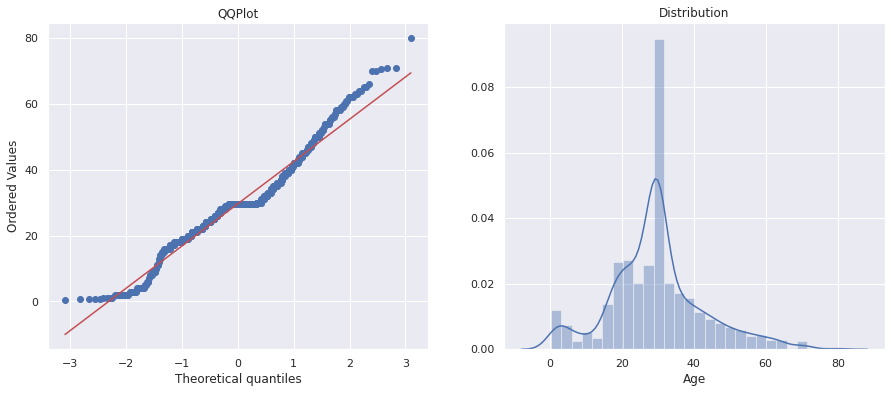

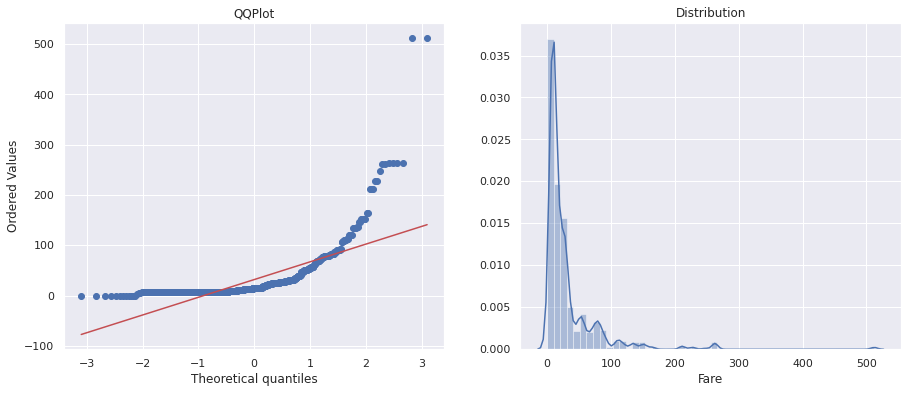

In [8]:
distro(X_train, cols)

In [9]:
def boxcox(X_train, X_test, cols):
  from scipy import stats
  for col in cols:
    X_train.loc[X_train[col]==0, col] = 0.0001
    X_train[col],_ = stats.boxcox(X_train[col]+1)
    X_test[col],_ = stats.boxcox(X_test[col]+1)

In [10]:
X_train.describe()

,Age,Fare
count,712.000000,712.000000
mean,29.697325,32.079453
std,13.059343,47.997059
min,0.420000,0.000000
25%,22.000000,7.925000
50%,29.699118,14.454200
75%,35.000000,31.275000
max,80.000000,512.329200


In [11]:
boxcox(X_train, X_test, ['Fare'])
X_train.describe()

,Age,Fare
count,712.000000,712.000000
mean,29.697325,2.568800
std,13.059343,0.734526
min,0.420000,0.000100
25%,22.000000,1.985031
50%,29.699118,2.424048
75%,35.000000,2.979564
max,80.000000,4.764021


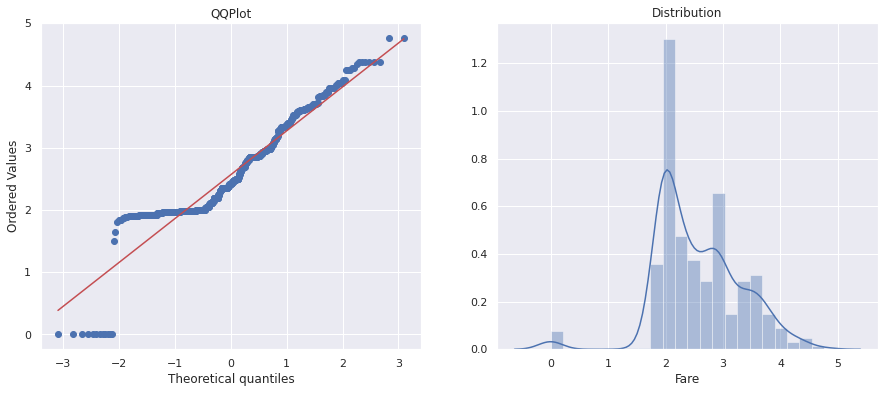

In [12]:
distro(X_train, ['Fare'])